In [396]:
# Import necessary packages

import json
import pymysql
import datetime
import time

# Import package for data analysis with Python
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import statsmodels package for training a linear regression model
import statsmodels.formula.api as sm

%matplotlib inline

In [397]:
host ="bikedata.c33719womxye.us-east-2.rds.amazonaws.com"
port = 3306
dbname="BikeData"
user = "aws137482dd"
password="bikerz123"

# default values for testing
weekday = 1
number = 1
conn = pymysql.connect(host, user=user, port=port, passwd=password,db=dbname)

# query for seleted station data
# sql = "SELECT TIME, NUMBER_OF_BIKES, NUMBER_OF_STANDS FROM BIKEDATA WHERE DAYOFWEEK(FROM_UNIXTIME(TIME/1000)) = {} AND STATION_NUMBER = {} ORDER BY TIME ASC".format(weekday,number)

sql_b = 'SELECT * FROM BIKEDATA;'
sql_w = 'SELECT * FROM WEATHERDATA;'

df_bikes = pd.read_sql(sql_b, conn)
df_weather = pd.read_sql(sql_w, conn)


In [398]:
df_bikes.shape

(797234, 9)

In [399]:
df_bikes.head()

,STATION_NAME,STATION_ADDRESS,STATION_NUMBER,STATUS,TIME,NUMBER_OF_STANDS,NUMBER_OF_BIKES,NUMBER_OF_SPACES,BANKING
0,SMITHFIELD NORTH,Smithfield North,42.0,OPEN,1.522870e+12,30.0,24.0,6.0,1.0
1,PARNELL SQUARE NORTH,Parnell Square North,30.0,OPEN,1.522870e+12,20.0,14.0,6.0,1.0
2,CLONMEL STREET,Clonmel Street,54.0,OPEN,1.522870e+12,33.0,2.0,31.0,0.0
3,MOUNT STREET LOWER,Mount Street Lower,56.0,OPEN,1.522870e+12,40.0,15.0,25.0,0.0
4,CHRISTCHURCH PLACE,Christchurch Place,6.0,OPEN,1.522870e+12,20.0,7.0,12.0,0.0


In [400]:
df_weather.shape

(531, 4)

In [401]:
df_weather.head()

,TEMPERATURE,RAIN,TIME,ID
0,8.04,0.005,14/03/2018 00:00,1
1,7.72,0.105,14/03/2018 03:00,2
2,7.65,0.26,14/03/2018 06:00,3
3,7.95,0.235,14/03/2018 09:00,4
4,8.10,0.475,14/03/2018 12:00,5


In [402]:
# Turn column into percentage value of occupancy (percentage of bikes available)
df_bikes['NUMBER_OF_BIKES'] = df_bikes['NUMBER_OF_BIKES'] / df_bikes['NUMBER_OF_STANDS'] * 100
df_bikes.head()

,STATION_NAME,STATION_ADDRESS,STATION_NUMBER,STATUS,TIME,NUMBER_OF_STANDS,NUMBER_OF_BIKES,NUMBER_OF_SPACES,BANKING
0,SMITHFIELD NORTH,Smithfield North,42.0,OPEN,1.522870e+12,30.0,80.000000,6.0,1.0
1,PARNELL SQUARE NORTH,Parnell Square North,30.0,OPEN,1.522870e+12,20.0,70.000000,6.0,1.0
2,CLONMEL STREET,Clonmel Street,54.0,OPEN,1.522870e+12,33.0,6.060606,31.0,0.0
3,MOUNT STREET LOWER,Mount Street Lower,56.0,OPEN,1.522870e+12,40.0,37.500000,25.0,0.0
4,CHRISTCHURCH PLACE,Christchurch Place,6.0,OPEN,1.522870e+12,20.0,35.000000,12.0,0.0


In [403]:
df_bikes.dtypes

STATION_NAME         object
STATION_ADDRESS      object
STATION_NUMBER      float64
STATUS               object
TIME                float64
NUMBER_OF_STANDS    float64
NUMBER_OF_BIKES     float64
NUMBER_OF_SPACES    float64
BANKING             float64
dtype: object

In [404]:
# Change time values to datatime
df_bikes['TIME'] = pd.to_datetime(df_bikes['TIME'], unit='ms')

df_bikes.head()

,STATION_NAME,STATION_ADDRESS,STATION_NUMBER,STATUS,TIME,NUMBER_OF_STANDS,NUMBER_OF_BIKES,NUMBER_OF_SPACES,BANKING
0,SMITHFIELD NORTH,Smithfield North,42.0,OPEN,2018-04-04 19:29:32,30.0,80.000000,6.0,1.0
1,PARNELL SQUARE NORTH,Parnell Square North,30.0,OPEN,2018-04-04 19:28:54,20.0,70.000000,6.0,1.0
2,CLONMEL STREET,Clonmel Street,54.0,OPEN,2018-04-04 19:29:32,33.0,6.060606,31.0,0.0
3,MOUNT STREET LOWER,Mount Street Lower,56.0,OPEN,2018-04-04 19:27:49,40.0,37.500000,25.0,0.0
4,CHRISTCHURCH PLACE,Christchurch Place,6.0,OPEN,2018-04-04 19:29:27,20.0,35.000000,12.0,0.0


In [406]:
# Change time values to datatime
df_weather['TIME'] = pd.to_datetime(df_weather['TIME'], format='%d/%m/%Y %H:%M', errors='ignore')

df_weather.head()

,TEMPERATURE,RAIN,TIME,ID
0,8.04,0.005,2018-03-14 00:00:00,1
1,7.72,0.105,2018-03-14 03:00:00,2
2,7.65,0.26,2018-03-14 06:00:00,3
3,7.95,0.235,2018-03-14 09:00:00,4
4,8.10,0.475,2018-03-14 12:00:00,5


In [407]:
df_weather.dtypes

TEMPERATURE           float64
RAIN                   object
TIME           datetime64[ns]
ID                      int64
dtype: object

In [408]:
# Remove duplicates
df_weather.drop_duplicates(subset='TIME', inplace=True)

In [409]:
# Set the date column as index
# df_bikes.set_index('TIME', inplace=True)
df_weather.set_index('TIME', inplace=True)

In [410]:
# df_bikes.sort_index(ascending=True, inplace=True)
# df_weather.sort_index(ascending=True, inplace=True)

In [414]:
df_weather.index.get_loc('2018-04-04 18:00:00', method='nearest')

array([174])

In [415]:
# Create new data frame to store temperature and rain values matched with time values in df_bikes
df_merge = pd.DataFrame(index=df_bikes.TIME.unique(), columns=['TEMPERATURE', 'RAIN'], dtype='float64')
df_merge.head()

,TEMPERATURE,RAIN
2018-04-04 19:29:32,NaN,NaN
2018-04-04 19:28:54,NaN,NaN
2018-04-04 19:27:49,NaN,NaN
2018-04-04 19:29:27,NaN,NaN
2018-04-04 19:29:18,NaN,NaN


In [416]:
df_merge.index.nunique()

129026

In [417]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [421]:
errors = 0

for row_bikes in df_merge.index:
    try:
        row_weather = nearest(df_weather.index, row_bikes)
        df_merge.TEMPERATURE[row_bikes] = df_weather.loc[row_weather][0]
        df_merge.RAIN[row_bikes] = df_weather.loc[row_weather][1]
    except:
        errors += 1

df_merge.head()

row_bikes:  2018-04-04 19:29:32
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:28:54
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:27:49
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:29:27
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:29:18
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:27:21
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:25:17
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bi

row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:28:36
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:20:03
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:24:51
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:23:23
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:25:06
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:24:08
row_weather:  2018-04-04 18:00:00
df_weather.loc[row_weather][0]:  5.78
df_weather.loc[row_weather][1]:  0.35
row_bikes:  2018-04-04 19:22:23
row_we

,TEMPERATURE,RAIN
2018-04-04 19:29:32,5.78,0.35
2018-04-04 19:28:54,5.78,0.35
2018-04-04 19:27:49,5.78,0.35
2018-04-04 19:29:27,5.78,0.35
2018-04-04 19:29:18,5.78,0.35


In [251]:
df_bikes = pd.concat([df_bikes,df_merge], axis=1)

df_bikes.head(200)

,STATION_NAME,STATION_ADDRESS,STATION_NUMBER,STATUS,NUMBER_OF_STANDS,NUMBER_OF_BIKES,NUMBER_OF_SPACES,BANKING,TEMPERATURE,RAIN
TIME,,,,,,,,,,
2018-04-04 19:19:38,NEWMAN HOUSE,Newman House,53.0,OPEN,40.0,0.000000,40.0,0.0,5.78,0.35
2018-04-04 19:19:46,OLIVER BOND STREET,Oliver Bond Street,74.0,OPEN,30.0,83.333333,5.0,0.0,5.78,0.35
2018-04-04 19:20:03,GEORGES LANE,George's Lane,50.0,OPEN,40.0,32.500000,27.0,0.0,5.78,0.35
2018-04-04 19:20:19,HEUSTON BRIDGE (SOUTH),Heuston Bridge (South),100.0,OPEN,25.0,100.000000,0.0,0.0,5.78,0.35
2018-04-04 19:20:33,YORK STREET WEST,York Street West,51.0,OPEN,40.0,0.000000,40.0,0.0,5.78,0.35
2018-04-04 19:20:38,HATCH STREET,Hatch Street,55.0,OPEN,36.0,0.000000,36.0,0.0,5.78,0.35
2018-04-04 19:20:39,KING STREET NORTH,King Street North,101.0,OPEN,30.0,50.000000,15.0,0.0,5.78,0.35
2018-04-04 19:20:49,FOWNES STREET UPPER,Fownes Street Upper,14.0,OPEN,30.0,10.000000,27.0,0.0,5.78,0.35
2018-04-04 19:20:50,ST JAMES HOSPITAL (LUAS),St James Hospital (Luas),80.0,OPEN,40.0,97.500000,1.0,0.0,5.78,0.35


In [422]:
df_merge['TEMPERATURE'].unique()

array([ 5.78,  5.62,   nan,  4.72,  3.89,  3.55,  7.51,  6.72,  8.01,
        7.49,  7.56,  7.63,  7.  ,  6.51,  6.58,  6.56,  9.01,  9.52,
       10.01, 11.52, 11.51, 12.  , 11.49, 12.44, 11.42, 10.49, 10.42,
       10.  ,  9.49,  9.42,  8.34,  9.  ,  7.97,  6.5 ,  6.01,  6.13,
        7.5 ,  8.5 ,  8.56,  9.44, 11.  , 11.01, 10.69, 11.56, 12.5 ,
       12.56, 10.5 ,  9.56,  8.13,  8.  ,  6.  ,  5.56,  6.44,  5.5 ,
        7.44, 10.56, 10.44, 11.5 , 11.44, 13.  , 11.13, 10.51,  9.5 ,
        6.49,  6.31,  5.88,  5.99,  5.44,  5.87, 10.13,  9.13,  7.45,
        7.73,  6.37])

In [423]:
df_weather['TEMPERATURE'].unique()

array([ 8.04,  7.72,  7.65,  7.95,  8.1 ,  8.2 ,  8.45,  8.32,  8.09,
        8.11,  8.16,  8.13,  8.29,  8.42,  7.85,  7.55,  7.13,  5.92,
        6.89,  8.63,  9.48,  7.9 ,  5.71,  6.73,  4.86,  3.22,  2.55,
        2.  ,  2.47,  1.22,  0.03,  0.5 , -0.22, -0.1 , -0.09,  0.23,
        1.1 ,  1.98,  1.19,  1.21,  1.41,  1.6 ,  2.63,  3.9 ,  5.7 ,
        5.3 ,  2.99,  1.71, -0.15, -1.95,  0.82,  5.9 ,  8.51,  1.57,
       -0.19,  0.39,  0.34,  3.79,  8.69, 10.22,  9.13,  7.57,  5.75,
        4.82,  4.9 ,  8.05,  9.58,  8.98,  7.98,  8.73,  9.37,  6.77,
        5.43,  6.01,  8.46,  9.26,  8.12,  5.96,  4.54,  2.34,  6.16,
        7.92,  9.54, 10.01,  5.28,  3.7 ,  1.48,  1.36,  4.24,  9.72,
        9.91,  9.24,  5.59,  3.41,  2.94,  9.85, 10.42,  8.71,  8.47,
        9.3 , 10.85,  8.97,  7.63,  8.92,  8.75,  7.19,  4.59,  3.54,
        3.62,  2.76,  3.95,  8.01,  7.68,  2.89,  3.72,  1.94,  5.13,
        5.84,  5.56,  5.02,  4.37,  3.78,  3.31,  3.84,  6.57,  4.66,
        5.76,  5.27,

Linear Regression

In [256]:
# Fit model using all seleted features
lm = sm.ols(formula="NUMBER_OF_BIKES ~ TEMPERATURE + RAIN", data=df_bikes).fit()

In [257]:
# Print the weights learned for each feature
print(lm.params)

Intercept      38.651262
TEMPERATURE     0.295258
RAIN           -4.407472
dtype: float64


In [258]:
# Print the table with feature weights, statistical confidence (p-values, confidence intervals) 
# and goodness of fit metrics (e.g., R-squared, Log-likelihood, AIB, BIC).
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        NUMBER_OF_BIKES   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     22.77
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           1.30e-10
Time:                        17:26:20   Log-Likelihood:            -6.9960e+05
No. Observations:              141586   AIC:                         1.399e+06
Df Residuals:                  141583   BIC:                         1.399e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6513      0.362    106.742      

In [259]:
# Create new data frame with predicted values
predict_df_bikes = pd.DataFrame({'actualAvail': df_bikes.NUMBER_OF_BIKES, 'predictedAvail': lm.predict(df_bikes)})

predict_df_bikes.head(200)

ValueError: cannot reindex from a duplicate axis

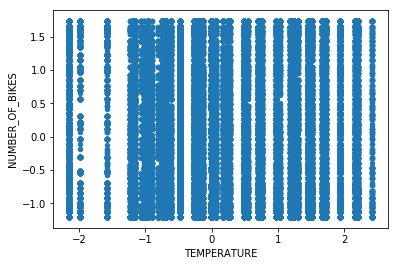

In [128]:
# Plot the observed data
df_bikes.plot(kind='scatter', x='TEMPERATURE', y='NUMBER_OF_BIKES')